In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz

[]

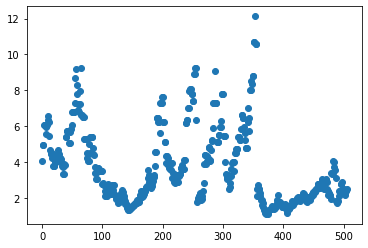

In [22]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

**Soru**

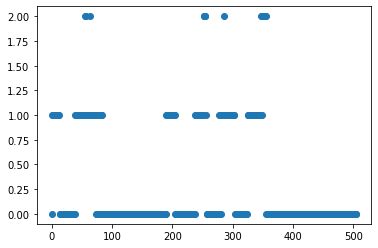

In [23]:
# y değişkeninin için pd.cut fonksiyonunu kullanarak df.DIS 'ın ayrıklaştırılmış hali ile doldurun 
                # NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS ,bins = pd.cut(df.DIS ,bins = 3 , retbins = True , labels =[0,1,2] )
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)
plt.show()

**pd.cut** fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?

-- Equal-frequency(Eşit frekans)
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [24]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-width")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
0    365
1    125
2     16
Name: DIS, dtype: int64 


Equal-width


**Soru**

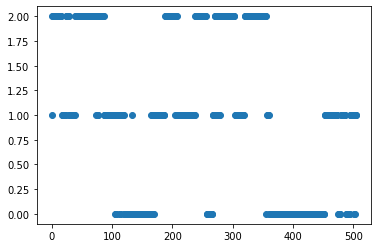

In [25]:
# aynı işlemi pd.qcut kullanarak yapın
# NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
new_DIS ,bins = pd.qcut(df.DIS,q = 3 ,labels = [0,1,2] , retbins = True   )
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)
plt.show()

**pd.qcut**fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?

-- Equal-frequency(Eşit frekans)
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [26]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-frequency.")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1296      2.38403333  4.3257     12.1265    ]

 Ayrık değerlerin görülme sayısı
2    169
0    169
1    168
Name: DIS, dtype: int64 


Equal-frequency.


**Feature Generation**

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [29]:
# seçtiğiniz iki değişkenin toplamından yeni bir değişken üretin
# INDUS +  PTRATIO

sum_column = df["INDUS"]+ df["PTRATIO"]
df["new_featureone"] = sum_column
print(df)


        CRIM    ZN  INDUS  CHAS  ...       B  LSTAT  PRICE  new_featureone
0    0.00632  18.0   2.31   0.0  ...  396.90   4.98   24.0           17.61
1    0.02731   0.0   7.07   0.0  ...  396.90   9.14   21.6           24.87
2    0.02729   0.0   7.07   0.0  ...  392.83   4.03   34.7           24.87
3    0.03237   0.0   2.18   0.0  ...  394.63   2.94   33.4           20.88
4    0.06905   0.0   2.18   0.0  ...  396.90   5.33   36.2           20.88
..       ...   ...    ...   ...  ...     ...    ...    ...             ...
501  0.06263   0.0  11.93   0.0  ...  391.99   9.67   22.4           32.93
502  0.04527   0.0  11.93   0.0  ...  396.90   9.08   20.6           32.93
503  0.06076   0.0  11.93   0.0  ...  396.90   5.64   23.9           32.93
504  0.10959   0.0  11.93   0.0  ...  393.45   6.48   22.0           32.93
505  0.04741   0.0  11.93   0.0  ...  396.90   7.88   11.9           32.93

[506 rows x 15 columns]


In [37]:
# seçtiğiniz iki değişkenin farkından yeni bir değişken üretin
#MEDV:Median value of owner-occupied homes in $1000's
#ZN: proportion of residential land zoned for lots over 25,000 sq.ft
#MEDV- ZN 
dist_column = df["INDUS"] - df["PTRATIO"]

df["IPDIST"] = dist_column

print(df)


        CRIM    ZN  INDUS  CHAS  ...  PRICE  new_featureone  medv_zn  IPDIST
0    0.00632  18.0   2.31   0.0  ...   24.0           17.61   -12.99  -12.99
1    0.02731   0.0   7.07   0.0  ...   21.6           24.87   -10.73  -10.73
2    0.02729   0.0   7.07   0.0  ...   34.7           24.87   -10.73  -10.73
3    0.03237   0.0   2.18   0.0  ...   33.4           20.88   -16.52  -16.52
4    0.06905   0.0   2.18   0.0  ...   36.2           20.88   -16.52  -16.52
..       ...   ...    ...   ...  ...    ...             ...      ...     ...
501  0.06263   0.0  11.93   0.0  ...   22.4           32.93    -9.07   -9.07
502  0.04527   0.0  11.93   0.0  ...   20.6           32.93    -9.07   -9.07
503  0.06076   0.0  11.93   0.0  ...   23.9           32.93    -9.07   -9.07
504  0.10959   0.0  11.93   0.0  ...   22.0           32.93    -9.07   -9.07
505  0.04741   0.0  11.93   0.0  ...   11.9           32.93    -9.07   -9.07

[506 rows x 17 columns]


In [40]:
# seçtiğiniz iki değişkenin bölümünden yeni bir değişken üretin
#Vergi Oranı (TAX)/Oda Sayısı (RM)

division = df["TAX"] / df["RM"]
df["New_Division"] = division
print(df)


        CRIM    ZN  INDUS  CHAS  ...  new_featureone  medv_zn  IPDIST  New_Division
0    0.00632  18.0   2.31   0.0  ...           17.61   -12.99  -12.99     45.019011
1    0.02731   0.0   7.07   0.0  ...           24.87   -10.73  -10.73     37.688834
2    0.02729   0.0   7.07   0.0  ...           24.87   -10.73  -10.73     33.681280
3    0.03237   0.0   2.18   0.0  ...           20.88   -16.52  -16.52     31.723350
4    0.06905   0.0   2.18   0.0  ...           20.88   -16.52  -16.52     31.061984
..       ...   ...    ...   ...  ...             ...      ...     ...           ...
501  0.06263   0.0  11.93   0.0  ...           32.93    -9.07   -9.07     41.407553
502  0.04527   0.0  11.93   0.0  ...           32.93    -9.07   -9.07     44.607843
503  0.06076   0.0  11.93   0.0  ...           32.93    -9.07   -9.07     39.134174
504  0.10959   0.0  11.93   0.0  ...           32.93    -9.07   -9.07     40.182514
505  0.04741   0.0  11.93   0.0  ...           32.93    -9.07   -9.07     45

In [71]:
division_two = df["CRIM"] / df["B"]
df["CB_Division"] = division_two
print(df)



        CRIM    ZN  INDUS  ...  New_Division  Multiplication  CB_Division
0    0.00632  18.0   2.31  ...     45.019011        2.508408     0.000016
1    0.02731   0.0   7.07  ...     37.688834       10.839339     0.000069
2    0.02729   0.0   7.07  ...     33.681280       10.720331     0.000069
3    0.03237   0.0   2.18  ...     31.723350       12.774173     0.000082
4    0.06905   0.0   2.18  ...     31.061984       27.405945     0.000174
..       ...   ...    ...  ...           ...             ...          ...
501  0.06263   0.0  11.93  ...     41.407553       24.550334     0.000160
502  0.04527   0.0  11.93  ...     44.607843       17.967663     0.000114
503  0.06076   0.0  11.93  ...     39.134174       24.115644     0.000153
504  0.10959   0.0  11.93  ...     40.182514       43.118186     0.000279
505  0.04741   0.0  11.93  ...     45.273632       18.817029     0.000119

[506 rows x 20 columns]


In [72]:
# seçtiğiniz iki değişkenin çarpımından yeni bir değişken üretin
 
multiplication = df["INDUS"]*df["PTRATIO"]
df["Multiplication"] = multiplication
print(df)

        CRIM    ZN  INDUS  ...  New_Division  Multiplication  CB_Division
0    0.00632  18.0   2.31  ...     45.019011          35.343     0.000016
1    0.02731   0.0   7.07  ...     37.688834         125.846     0.000069
2    0.02729   0.0   7.07  ...     33.681280         125.846     0.000069
3    0.03237   0.0   2.18  ...     31.723350          40.766     0.000082
4    0.06905   0.0   2.18  ...     31.061984          40.766     0.000174
..       ...   ...    ...  ...           ...             ...          ...
501  0.06263   0.0  11.93  ...     41.407553         250.530     0.000160
502  0.04527   0.0  11.93  ...     44.607843         250.530     0.000114
503  0.06076   0.0  11.93  ...     39.134174         250.530     0.000153
504  0.10959   0.0  11.93  ...     40.182514         250.530     0.000279
505  0.04741   0.0  11.93  ...     45.273632         250.530     0.000119

[506 rows x 20 columns]


sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin
 (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [48]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, interaction_only=False)
pd.DataFrame(poly.fit_transform(df))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,17.61,-12.99,-12.99,45.019011,2.508408
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,24.87,-10.73,-10.73,37.688834,10.839339
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,24.87,-10.73,-10.73,33.681280,10.720331
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,20.88,-16.52,-16.52,31.723350,12.774173
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,20.88,-16.52,-16.52,31.061984,27.405945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,32.93,-9.07,-9.07,41.407553,24.550334
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,32.93,-9.07,-9.07,44.607843,17.967663
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,32.93,-9.07,-9.07,39.134174,24.115644
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,32.93,-9.07,-9.07,40.182514,43.118186


**Normalizasyon**

sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın.

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
minmax_df = scaler.fit_transform(df)
df_norm = pd.DataFrame(minmax_df)
print(df_norm)


           0     1         2    3   ...        15        16        17        18
0    0.000000  0.18  0.067815  0.0  ...  0.256040  0.256040  0.125467  0.000010
1    0.000236  0.00  0.242302  0.0  ...  0.337541  0.337541  0.080325  0.000246
2    0.000236  0.00  0.242302  0.0  ...  0.337541  0.337541  0.055645  0.000243
3    0.000293  0.00  0.063050  0.0  ...  0.128741  0.128741  0.043587  0.000301
4    0.000705  0.00  0.063050  0.0  ...  0.128741  0.128741  0.039514  0.000715
..        ...   ...       ...  ...  ...       ...       ...       ...       ...
501  0.000633  0.00  0.420455  0.0  ...  0.397404  0.397404  0.103226  0.000634
502  0.000438  0.00  0.420455  0.0  ...  0.397404  0.397404  0.122935  0.000448
503  0.000612  0.00  0.420455  0.0  ...  0.397404  0.397404  0.089226  0.000622
504  0.001161  0.00  0.420455  0.0  ...  0.397404  0.397404  0.095682  0.001160
505  0.000462  0.00  0.420455  0.0  ...  0.397404  0.397404  0.127035  0.000472

[506 rows x 19 columns]


sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın

In [67]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler() 
stasca_df = scaler.fit_transform(df)
df_norm = pd.DataFrame(stasca_df)
print(df_norm)


           0         1         2   ...        16        17        18
0   -0.419782  0.284830 -1.287909  ... -0.893498 -0.693577 -0.370183
1   -0.417339 -0.487722 -0.593381  ... -0.537438 -0.927610 -0.367050
2   -0.417342 -0.487722 -0.593381  ... -0.537438 -1.055561 -0.367095
3   -0.416750 -0.487722 -1.306878  ... -1.449645 -1.118072 -0.366323
4   -0.412482 -0.487722 -1.306878  ... -1.449645 -1.139188 -0.360822
..        ...       ...       ...  ...       ...       ...       ...
501 -0.413229 -0.487722  0.115738  ... -0.275907 -0.808881 -0.361895
502 -0.415249 -0.487722  0.115738  ... -0.275907 -0.706704 -0.364370
503 -0.413447 -0.487722  0.115738  ... -0.275907 -0.881464 -0.362059
504 -0.407764 -0.487722  0.115738  ... -0.275907 -0.847993 -0.354914
505 -0.415000 -0.487722  0.115738  ... -0.275907 -0.685447 -0.364051

[506 rows x 19 columns]


sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın.

In [68]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
robus_df = scaler.fit_transform(df)
df_norm = pd.DataFrame(robus_df)
print(df_norm)


           0     1         2    3   ...        15        16        17        18
0   -0.069593  1.44 -0.571650  0.0  ... -0.375622 -0.375622 -0.157725 -0.155836
1   -0.063755  0.00 -0.202943  0.0  ... -0.161252 -0.161252 -0.292595 -0.141457
2   -0.063760  0.00 -0.202943  0.0  ... -0.161252 -0.161252 -0.366331 -0.141663
3   -0.062347  0.00 -0.581720  0.0  ... -0.710458 -0.710458 -0.402355 -0.138118
4   -0.052144  0.00 -0.581720  0.0  ... -0.710458 -0.710458 -0.414524 -0.112866
..        ...   ...       ...  ...  ...       ...       ...       ...       ...
501 -0.053930  0.00  0.173509  0.0  ... -0.003794 -0.003794 -0.224173 -0.117794
502 -0.058759  0.00  0.173509  0.0  ... -0.003794 -0.003794 -0.165291 -0.129155
503 -0.054450  0.00  0.173509  0.0  ... -0.003794 -0.003794 -0.266002 -0.118544
504 -0.040867  0.00  0.173509  0.0  ... -0.003794 -0.003794 -0.246713 -0.085748
505 -0.058164  0.00  0.173509  0.0  ... -0.003794 -0.003794 -0.153041 -0.127689

[506 rows x 19 columns]


# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.

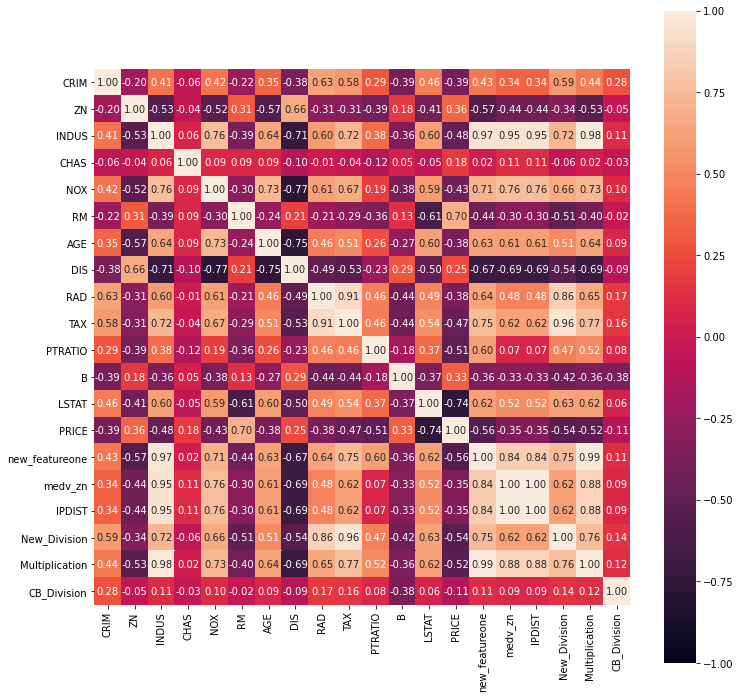

In [73]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

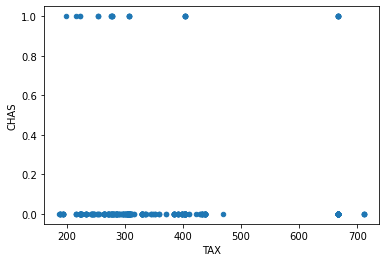

In [70]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

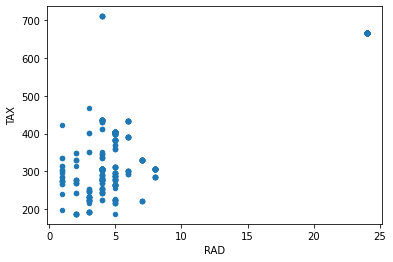

Oto yola yakınlık artıkça vergi oranıda artar.


In [75]:

#RAD ,TAX
df.plot.scatter("RAD","TAX")
plt.show()
print("Oto yola yakınlık artıkça vergi oranıda artar.")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

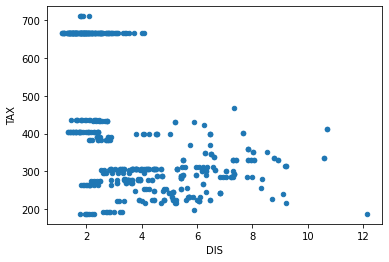

Vergi oranı ile merkeze yakınlık arasında negatif korelasyon vardır.


In [77]:
# python kodu buraya
df.plot.scatter("DIS","TAX")
plt.show()
print("Vergi oranı ile merkeze yakınlık arasında negatif korelasyon vardır.")

**Soru**

Adım 1 :df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı) heatmap için vmin ve vmax parametrelerini kullanmayın.



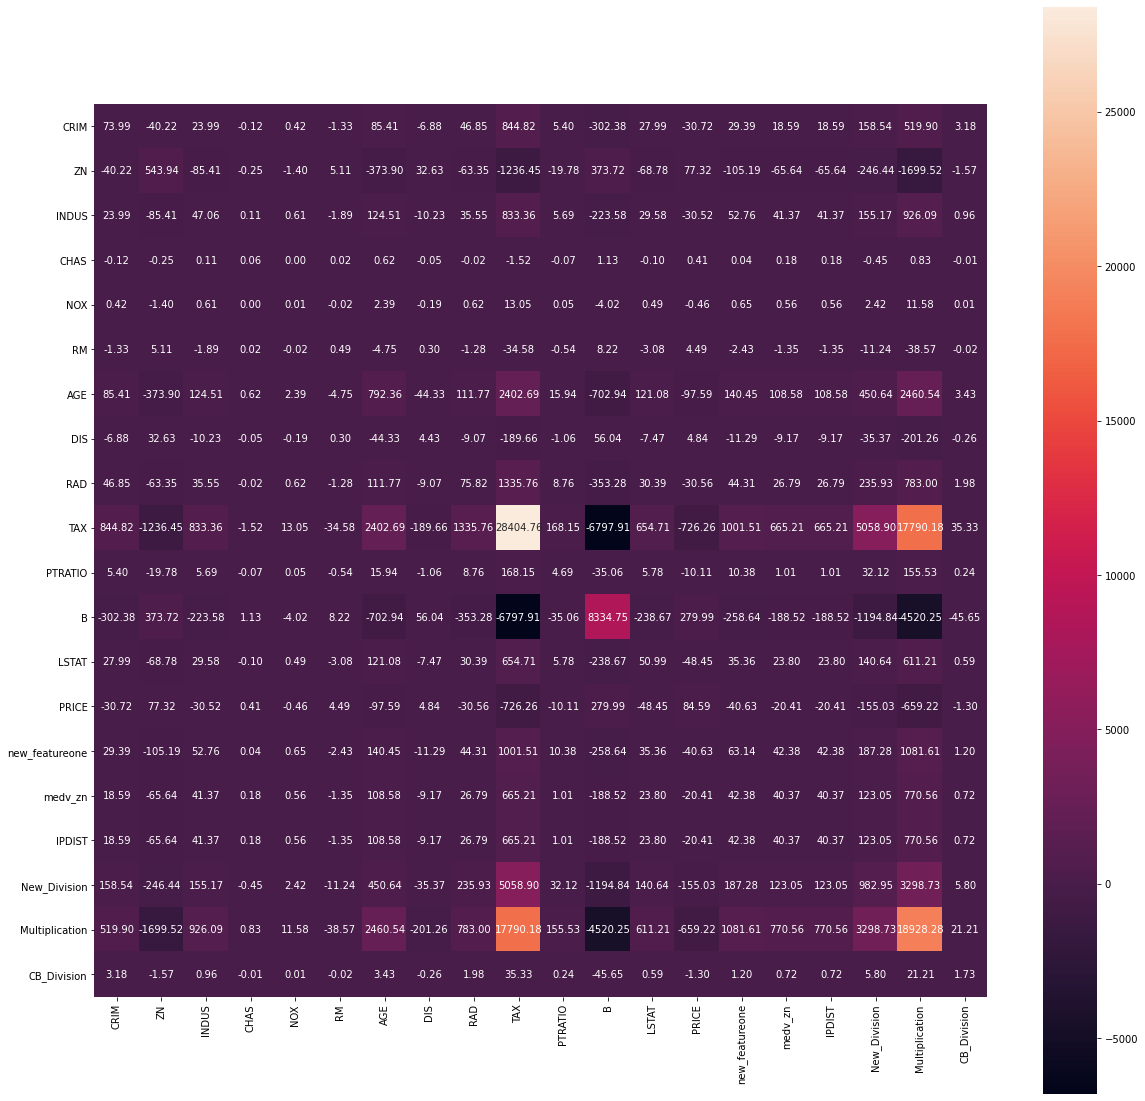

In [81]:
# Heatmap için python kodunu bu hücreye yazın

plt.figure(figsize=(20,20))
sns.heatmap(df.cov() , square=True, annot=True, fmt='.2f')
plt.show()

print("CRIM ile TAX arasında güçlü bir kovaryans vardır.")
# Bilgi: Kovaryans değerinden anlam çıkartmak korelasyona göre daha zor çıkan grafikten bunu farkedebilirsiniz.

Adım 2 : Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.



IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)



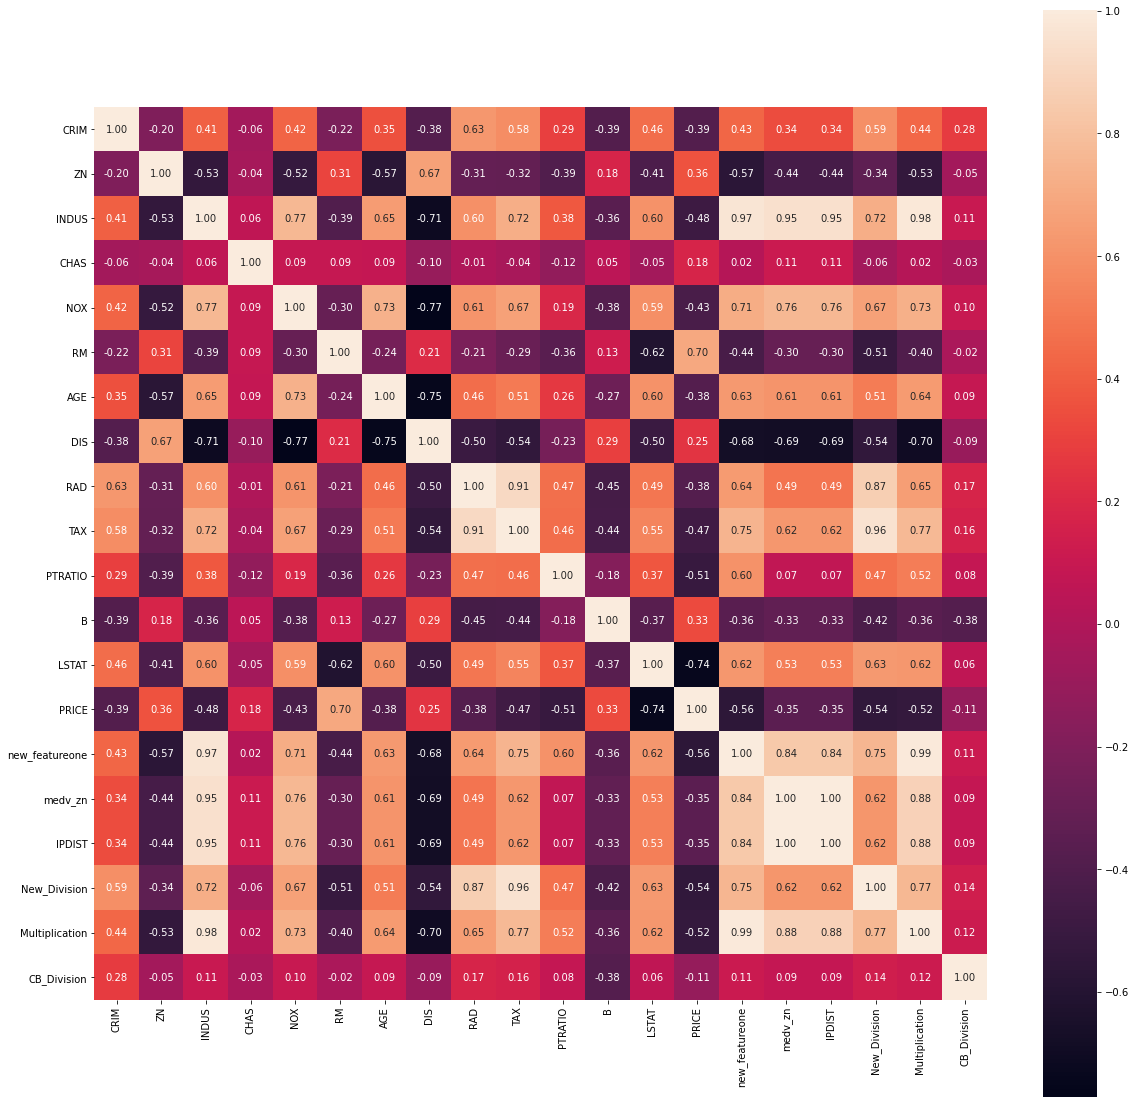

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
stasca_df = scaler.fit_transform(df)
df_norm = pd.DataFrame(stasca_df, columns = df.columns)


plt.figure(figsize=(20,20))
sns.heatmap(df_norm.cov() , square=True, annot=True, fmt='.2f')
plt.show()
